In [14]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [5]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [ ]:
!tar -xf lfw.tgz

In [ ]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [16]:
# Import uuid library to generate unique image names
import uuid

In [17]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))


'data\\anchor\\019147cb-8f6c-11ef-93dd-089df4809e5d.jpg'

In [20]:


# Define paths for saving images
POS_PATH = os.path.join('data', 'positive')
ANC_PATH = os.path.join('data', 'anchor')

# Ensure directories exist
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)  # Change the index if needed

if not cap.isOpened():
    print("Error: Could not open video device")
    exit()

while cap.isOpened(): 
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break
    
    # Display the frame on the screen
    cv2.imshow('Image Collection', frame)
    
    # Collect anchor images when 'a' is pressed
    if cv2.waitKey(1) & 0xFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        print(f"Anchor image saved at {imgname}")
    
    # Collect positive images when 'p' is pressed
    if cv2.waitKey(1) & 0xFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        print(f"Positive image saved at {imgname}")
    
    # Detect if 'q' is pressed to break the loop
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10 milliseconds
    if key == ord('q'):
        print("Exiting image collection")
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


Anchor image saved at data\anchor\976419eb-8f6c-11ef-865a-089df4809e5d.jpg
Anchor image saved at data\anchor\9772e783-8f6c-11ef-8c63-089df4809e5d.jpg
Anchor image saved at data\anchor\977f21a9-8f6c-11ef-90fe-089df4809e5d.jpg
Anchor image saved at data\anchor\978dd8fb-8f6c-11ef-913d-089df4809e5d.jpg
Anchor image saved at data\anchor\97a8711b-8f6c-11ef-aa0c-089df4809e5d.jpg
Anchor image saved at data\anchor\97b71b14-8f6c-11ef-ba31-089df4809e5d.jpg
Anchor image saved at data\anchor\97c5d680-8f6c-11ef-b01e-089df4809e5d.jpg
Anchor image saved at data\anchor\97cd3a08-8f6c-11ef-9586-089df4809e5d.jpg
Anchor image saved at data\anchor\97dbcfbf-8f6c-11ef-8fd1-089df4809e5d.jpg
Anchor image saved at data\anchor\97ea31a7-8f6c-11ef-8107-089df4809e5d.jpg
Anchor image saved at data\anchor\97f1b61e-8f6c-11ef-91a9-089df4809e5d.jpg
Anchor image saved at data\anchor\97fb7329-8f6c-11ef-8e99-089df4809e5d.jpg
Anchor image saved at data\anchor\9804e66b-8f6c-11ef-bb65-089df4809e5d.jpg
Anchor image saved at dat

In [22]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\\*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'\\*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\\*.jpg').take(3000)

In [23]:
dir_test = anchor.as_numpy_iterator()

In [24]:
print(dir_test.next())

b'data\\anchor\\0cc124bf-8f6c-11ef-bc95-089df4809e5d.jpg'


In [25]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [26]:
img = preprocess('data\\anchor\\0cc124bf-8f6c-11ef-bc95-089df4809e5d.jpg')

In [27]:
img.numpy().max() 

1.0

In [30]:
Dataset.map(preprocess)

NameError: name 'Dataset' is not defined

In [31]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [32]:
samples = data.as_numpy_iterator()

In [33]:
exampple = samples.next()

In [34]:
exampple

(b'data\\anchor\\c5aa9be6-8f6c-11ef-9aeb-089df4809e5d.jpg',
 b'data\\positive\\1ddcbfc1-8f6c-11ef-880f-089df4809e5d.jpg',
 1.0)

In [35]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [36]:
res = preprocess_twin(*exampple)

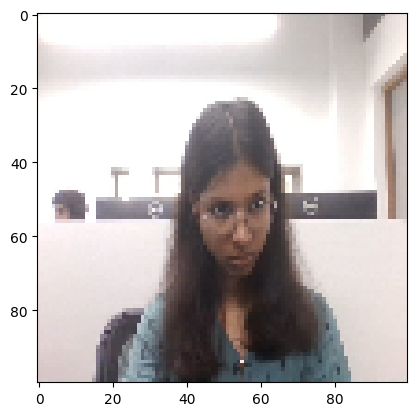

In [37]:
plt.imshow(res[1])

In [38]:
res[2]

1.0

In [39]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [40]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [41]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [42]:
inp = Input(shape=(100,100,3), name='input_image')


In [43]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)


In [44]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)


In [45]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [46]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [47]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [48]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')


In [49]:
mod.summary()


Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [51]:
embedding = make_embedding()

In [52]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
class L1Dist(Layer):
    def call(self, input_embedding, validation_embedding):
        # Ensure inputs are tensors
        input_embedding = tf.convert_to_tensor(input_embedding)
        validation_embedding = tf.convert_to_tensor(validation_embedding)
        
        # Compute L1 distance (absolute difference)
        return tf.math.abs(input_embedding - validation_embedding)

# Define input layers
input_image = Input(name='input_img', shape=(100, 100, 3))
validation_image = Input(name='validation_img', shape=(100, 100, 3))

# Dummy embedding layer (replace with actual embedding logic)
embedding = tf.keras.layers.Flatten()

# Compute embeddings
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

# L1 Distance layer
siamese_layer = L1Dist()

# Compute distances
distances = siamese_layer(inp_embedding, val_embedding)

In [65]:
classifier = Dense(1, activation='sigmoid')(distances)

In [66]:
classifier


<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_27>

In [67]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [68]:
siamese_network.summary()


Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 30000)             │               0 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_3 (L1Dist)            │ (None, 30000)             │               0 │ flatten_3[0][0],           │
│                               │                           │                 │ flatten_3[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 1)                 │          30,001 │ l1_dist_3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 30,001 (117.19 KB)

 Trainable params: 30,001 (117.19 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [70]:
siamese_model = make_siamese_model()

In [71]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 30000)             │               0 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_4 (L1Dist)            │ (None, 30000)             │               0 │ flatten_3[2][0],           │
│                               │                           │                 │ flatten_3[3][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 1)                 │          30,001 │ l1_dist_4[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 30,001 (117.19 KB)

 Trainable params: 30,001 (117.19 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
binary_cross_loss = tf.losses.BinaryCrossentropy()


In [73]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001


In [74]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [75]:
test_batch = train_data.as_numpy_iterator()


In [76]:
batch_1 = test_batch.next()

In [77]:
X = batch_1[:2]


In [78]:
y = batch_1[2]


In [79]:
y


array([0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

In [80]:
tf.losses.BinaryCrossentropy??


Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
    dtype=None,
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](htt

In [81]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [82]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [83]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [84]:
EPOCHS = 50


In [86]:
train(train_data, EPOCHS)



 Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepte
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34m

In [87]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [88]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [89]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [90]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

In [91]:
y_true

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

In [92]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [93]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [94]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1.0 1.0


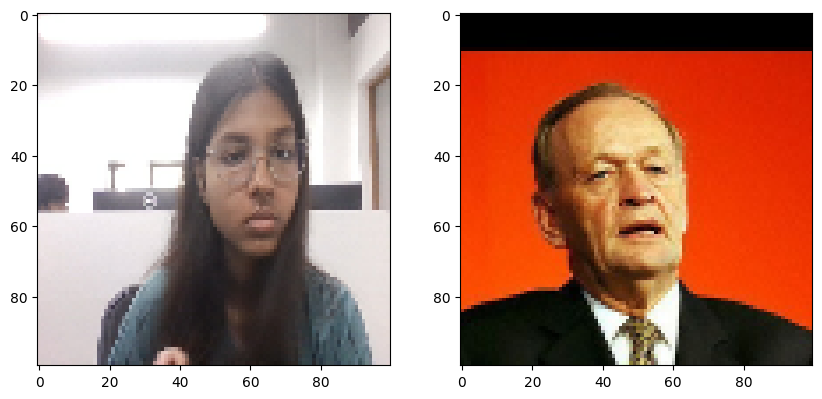

In [96]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [97]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

In [98]:
L1Dist

__main__.L1Dist

In [99]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [100]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[1.1579354e-12],
       [9.9987042e-01],
       [9.9677235e-01],
       [8.0647950e-13],
       [9.9975401e-01],
       [1.1239745e-11],
       [2.4394874e-16],
       [9.9999785e-01],
       [9.9999356e-01],
       [1.5898100e-06],
       [1.5902276e-18],
       [9.9936193e-01]], dtype=float32)

In [101]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 30000)             │               0 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_4 (L1Dist)            │ (None, 30000)             │               0 │ flatten_3[0][0],           │
│                               │                           │                 │ flatten_3[1][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 1)                 │          30,001 │ l1_dist_4[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 30,001 (117.19 KB)

 Trainable params: 30,001 (117.19 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
os.listdir(os.path.join('application_data', 'verification_images'))

['17b173f1-8f6c-11ef-84c5-089df4809e5d.jpg',
 '17c4e8c2-8f6c-11ef-9fcb-089df4809e5d.jpg',
 '17e22906-8f6c-11ef-ab51-089df4809e5d.jpg',
 '18f3e265-8f6c-11ef-8c13-089df4809e5d.jpg',
 '18fadaab-8f6c-11ef-98de-089df4809e5d.jpg',
 '19a1f586-8f6c-11ef-9f5a-089df4809e5d.jpg',
 '19aab7d0-8f6c-11ef-8882-089df4809e5d.jpg',
 '19b92738-8f6c-11ef-bd18-089df4809e5d.jpg',
 '19c18e2c-8f6c-11ef-ae41-089df4809e5d.jpg',
 '1b117321-8f6c-11ef-b318-089df4809e5d.jpg',
 '1b3699fc-8f6c-11ef-8211-089df4809e5d.jpg',
 '1b3ebbcb-8f6c-11ef-8725-089df4809e5d.jpg',
 '1b49b81e-8f6c-11ef-8389-089df4809e5d.jpg',
 '1b536f49-8f6c-11ef-b5ad-089df4809e5d.jpg',
 '1b5ac1ab-8f6c-11ef-b369-089df4809e5d.jpg',
 '1b6bf054-8f6c-11ef-a876-089df4809e5d.jpg',
 '1b7404a0-8f6c-11ef-80f6-089df4809e5d.jpg',
 '1b81d8d1-8f6c-11ef-9458-089df4809e5d.jpg',
 '1ba1a2fa-8f6c-11ef-9994-089df4809e5d.jpg',
 '1bd98fd7-8f6c-11ef-9c2e-089df4809e5d.jpg',
 '1bed8fe1-8f6c-11ef-8e5c-089df4809e5d.jpg',
 '1c1e10c3-8f6c-11ef-b336-089df4809e5d.jpg',
 '1c34715a

In [104]:
os.path.join('application_data', 'input_image', 'input_image.jpg')


'application_data\\input_image\\input_image.jpg'

In [105]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\17b173f1-8f6c-11ef-84c5-089df4809e5d.jpg
application_data\verification_images\17c4e8c2-8f6c-11ef-9fcb-089df4809e5d.jpg
application_data\verification_images\17e22906-8f6c-11ef-ab51-089df4809e5d.jpg
application_data\verification_images\18f3e265-8f6c-11ef-8c13-089df4809e5d.jpg
application_data\verification_images\18fadaab-8f6c-11ef-98de-089df4809e5d.jpg
application_data\verification_images\19a1f586-8f6c-11ef-9f5a-089df4809e5d.jpg
application_data\verification_images\19aab7d0-8f6c-11ef-8882-089df4809e5d.jpg
application_data\verification_images\19b92738-8f6c-11ef-bd18-089df4809e5d.jpg
application_data\verification_images\19c18e2c-8f6c-11ef-ae41-089df4809e5d.jpg
application_data\verification_images\1b117321-8f6c-11ef-b318-089df4809e5d.jpg
application_data\verification_images\1b3699fc-8f6c-11ef-8211-089df4809e5d.jpg
application_data\verification_images\1b3ebbcb-8f6c-11ef-8725-089df4809e5d.jpg
application_data\verification_images\1b49b81e-8f6c-11ef-8389-089

In [106]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [119]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

In [115]:
np.sum(np.squeeze(results) > 0.9)

49

In [116]:
results

[array([[0.9891323]], dtype=float32),
 array([[0.98557967]], dtype=float32),
 array([[0.9885935]], dtype=float32),
 array([[0.98320645]], dtype=float32),
 array([[0.9831072]], dtype=float32),
 array([[0.9874274]], dtype=float32),
 array([[0.9866582]], dtype=float32),
 array([[0.9808533]], dtype=float32),
 array([[0.9781361]], dtype=float32),
 array([[0.9841026]], dtype=float32),
 array([[0.9921058]], dtype=float32),
 array([[0.9918444]], dtype=float32),
 array([[0.9913067]], dtype=float32),
 array([[0.9909704]], dtype=float32),
 array([[0.989035]], dtype=float32),
 array([[0.98929554]], dtype=float32),
 array([[0.98952025]], dtype=float32),
 array([[0.98949707]], dtype=float32),
 array([[0.991678]], dtype=float32),
 array([[0.99768764]], dtype=float32),
 array([[0.9976845]], dtype=float32),
 array([[0.99770844]], dtype=float32),
 array([[0.99769866]], dtype=float32),
 array([[0.997738]], dtype=float32),
 array([[0.99775547]], dtype=float32),
 array([[0.997701]], dtype=float32),
 array(